This notebook is for comparing the gap filling techniques visually

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# First import the model
from modules.util import gap_filling_mlp
from columns import COLS_FEATURES, COLS_LABELS, COLS_TIME

In [6]:
# Load the data on which predictions and or gap filling are to be done
path_model = 'model_saves/mlp_1.pth'
path_data = 'data/data_merged_with_nans.csv'
df_mlp = gap_filling_mlp(path_model, path_data, COLS_FEATURES, COLS_LABELS)
df_f = pd.read_csv(path_data)

In [7]:
df = df_mlp[COLS_TIME + ["H_f_mlp", "LE_f_mlp"]].merge(df_f, how='outer', on=COLS_TIME)

In [8]:
# filter by location and sort by date
df_bg = df[df['location'] == 0].sort_values(by=['year', 'month', 'day', '30min'])
df_gw = df[df['location'] == 1].sort_values(by=['year', 'month', 'day', '30min'])

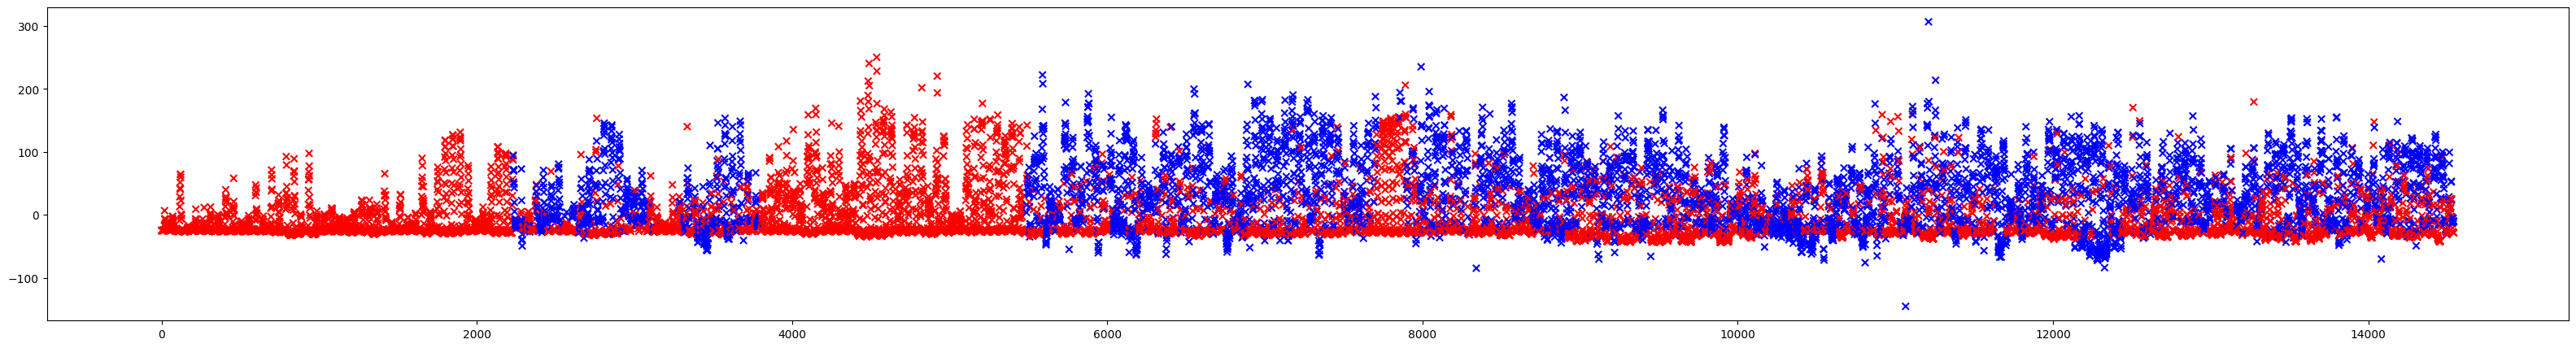

In [9]:
# Create plots of the filled frame
time = np.arange(df_bg.shape[0])

plt.figure(figsize=(40,5))
plt.scatter(time, df_bg['H_f_mlp'].to_numpy(), marker='x', c=df_bg['H_orig'].apply(lambda x: 'red' if pd.isna(x) else 'blue'))

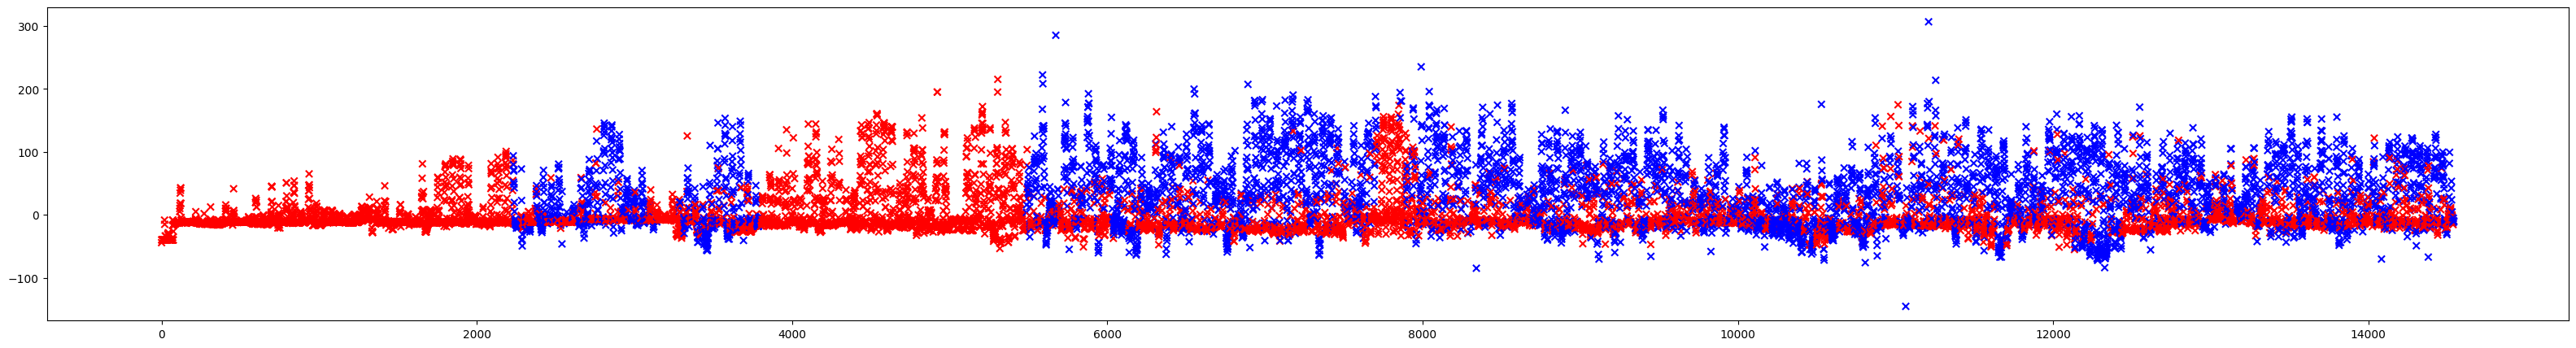

In [10]:
plt.figure(figsize=(40,5))
plt.scatter(time, df_bg['H_f'].to_numpy(), marker='x', c=df_bg['H_orig'].apply(lambda x: 'red' if pd.isna(x) else 'blue'))